In [1]:
! pip install opencv-python


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip install ultralytics


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np

model = YOLO('best_mod.pt')

In [4]:
img = cv2.imread('6.jpg')
model.cpu()
results = model(img, imgsz=640, iou=0.2, conf=0.2, verbose=False)

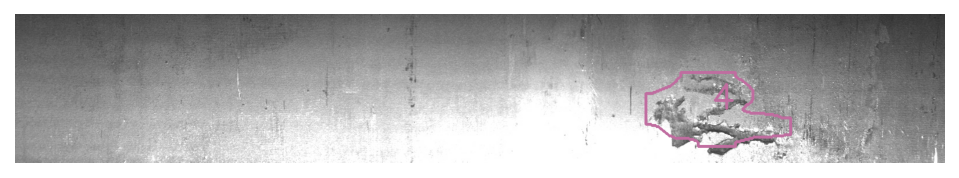

True

In [5]:
from PIL import Image
classes = results[0].boxes.cls.cpu().numpy()
class_names = results[0].names

masks = results[0].masks.data
num_masks = masks.shape[0]

colors = [tuple(np.random.randint(0, 256, 3).tolist()) for _ in range(num_masks)]

mask_overlay = np.zeros_like(img)

labeled_image = img.copy()

for i in range(num_masks):
    color = colors[i]
    mask = masks[i].cpu()

    mask_resized = cv2.resize(np.array(mask), (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)

    class_index = int(classes[i])
    class_name = class_names[class_index]

    mask_contours, _ = cv2.findContours(mask_resized.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(labeled_image, mask_contours, -1, color, 3)
    cv2.putText(labeled_image, class_name, (int(mask_contours[0][:,0,0].mean()), int(mask_contours[0][:,0,1].mean())), cv2.FONT_HERSHEY_SIMPLEX, 2, color, 3)
plt.figure(figsize=(8,8), dpi=150)
labeled_image = cv2.cvtColor(labeled_image, cv2.COLOR_BGR2RGB)
plt.imshow(labeled_image)
plt.axis('off')
plt.show()
cv2.imwrite('output_image.jpg', cv2.cvtColor(labeled_image, cv2.COLOR_RGB2BGR)) 

